# DOGS: Data Exploration #

### Imports ###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preview ###
Dog data was extracted from the data exported from the Champ_DOG_Preprocessing notebook.

In [2]:
dog_data = pd.read_csv('dog_data.csv', index_col=0)

In [3]:
print("Total entries: ", len(dog_data))
dog_data.head()

Total entries:  52240


,AnimalID,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,OutcomeSubtype,IntakeMonth,IntakeYear,IntakeDotW,OutcomeMonth,OutcomeYear,OutcomeDotW,IntakeAge,TimeUntilOutcome,LiveOutcome,IntakeTypes,Color,Breed
0,A281756,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,TIME/SPACE,9,2006,0,9,2006,1,365.0,1,0,"OWNERSUR,OTC",WHITE,PIT BULL
1,A256128,AMERICAN PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,MEDICAL,11,2005,5,12,2005,3,NaN,12,0,"STRAY,FIELD",BROWN,PIT BULL
2,A316619,LABRADOR RETRIEVER,MALE,FEARFUL,HEALTHY,FERTILE,EUTH,TIME/SPACE,6,2007,4,7,2007,2,NaN,5,0,"STRAY,FIELD",WHITE,LABRADOR RETRIEVER
3,A319056,BEAGLE,MALE,NORMAL,HEALTHY,ALTERED,EUTH,TIME/SPACE,7,2007,3,8,2007,1,NaN,19,0,"STRAY,OTC",TRICOLOR,BEAGLE
4,A258842,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,BREED,12,2005,2,12,2005,3,NaN,8,0,"CONFISCATE,CRUELTY",WHITE,PIT BULL


### Exploring Intake Type Volume and Distributions ###

#### Number of Intakes Annually ####

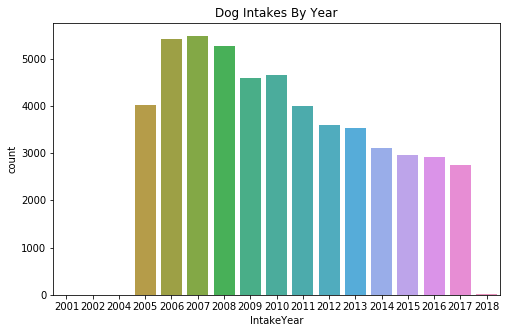

In [4]:
fig, ax = plt.subplots()
ax = sns.countplot(x = "IntakeYear", data = dog_data)
ax.set_title("Dog Intakes By Year")
fig.set_size_inches(8, 5)

It seems that the number of intakes peaked just before the recession (2006-2008) and slowly has gone down since then. It should be noted that data from 2018 is incomplete and is therefore showing an exceptionally low number.

#### Average Number of Intakes by Month ####

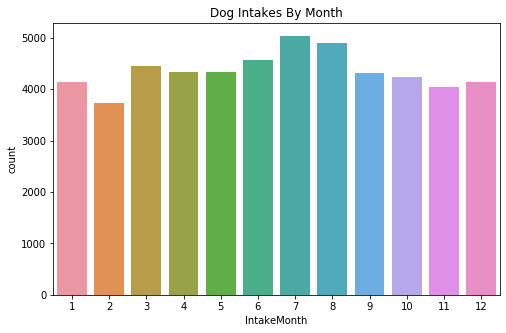

In [5]:
fig, ax = plt.subplots()
ax = sns.countplot(x = "IntakeMonth", data = dog_data)
ax.set_title("Dog Intakes By Month")
fig.set_size_inches(8, 5)

For dogs, the number of intakes remains fairly consistent month to month, but increases slightly during the summer months (July and August).

#### Average Number of Intakes by Day of the Week ####

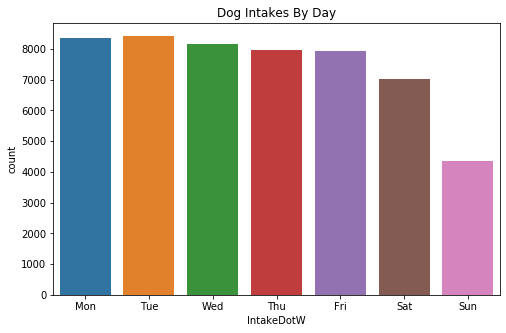

In [6]:
fig, ax = plt.subplots()
ax = sns.countplot(x = "IntakeDotW", data = dog_data)
ax.set_title("Dog Intakes By Day")
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
fig.set_size_inches(8, 5)

Intakes happen most often on weekdays, decreasing slightly on Saturdays, and being exceptionally low on Sundays. This is likely due to the fact that most shelters will be open on weekdays, while some may close on Saturdays, and a significant number being closed on Sundays.

#### IntakeType Counts ####

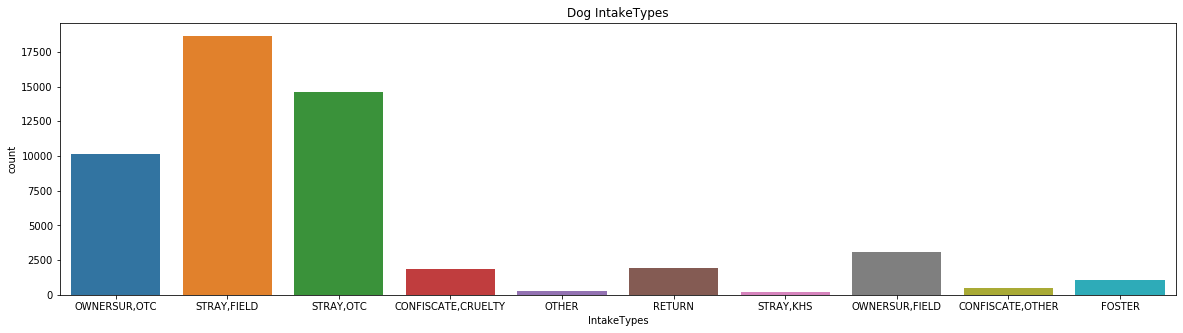

In [7]:
fig, ax = plt.subplots()
ax = sns.countplot(x = "IntakeTypes", data = dog_data)
ax.set_title("Dog IntakeTypes")
fig.set_size_inches(20, 5)

The three dominant IntakeTypes are strays (both brought into the shelter and caught in the field) and owner surrenders where the owner brought the dog to the shelter. Confiscations due to cruelty and returns were much higher than with cats.

#### IntakeAge Distribution ####

In [8]:
ValidAges = dog_data[dog_data['IntakeAge'] > 0]     # dogs with an IntakeAge that is not NaN
YoungAges = ValidAges[ValidAges['IntakeAge'] < 365] # dogs that are younger than 1 year old

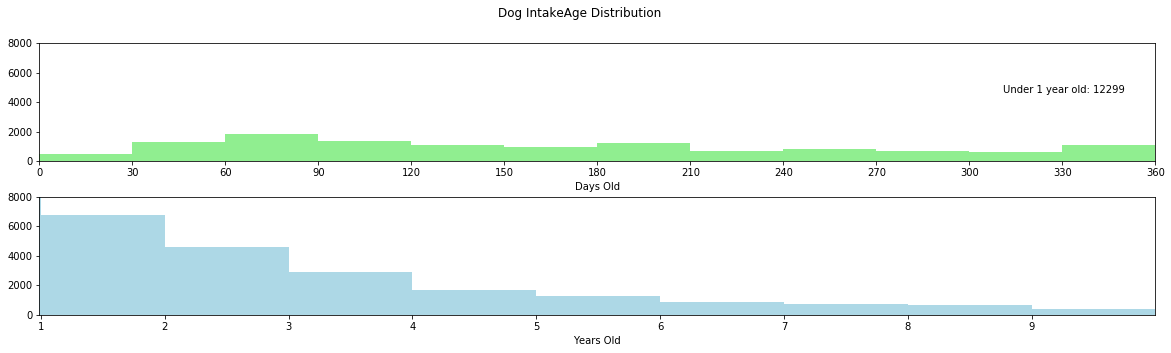

In [9]:
fig, (ax1,ax2) = plt.subplots(2)

ax1.hist(YoungAges['IntakeAge'], bins=range(0,390,30), color='lightgreen')
ax1.set_xticks(range(0,390,30))
ax1.set_xlim(0, 360)
ax1.set_ylim(0, 8000)
ax1.set_xlabel('Days Old')
plt.text(3200,15000,'Under 1 year old: {}'.format(len(YoungAges)))

ax2.hist(ValidAges['IntakeAge'], bins=range(0,4015,365), color='lightblue')
ax2.set_xticks(range(0,3650,365))
ax2.set_xticklabels(range(0,11))
ax2.set_xlim(360, 3650)
ax2.set_ylim(0, 8000)
ax2.set_xlabel('Years Old')

fig.suptitle('Dog IntakeAge Distribution')
fig.set_size_inches(20, 5)
plt.subplots_adjust(hspace=0.3)

By far the largest bin for dog intake age is between 0-1 years old. From there, there is an inverse relationship between number of animals per bin and age. In contrast with kittens, puppies are far less likely to end up in the shelter.

#### TimeUntilOutcome Distribution ####

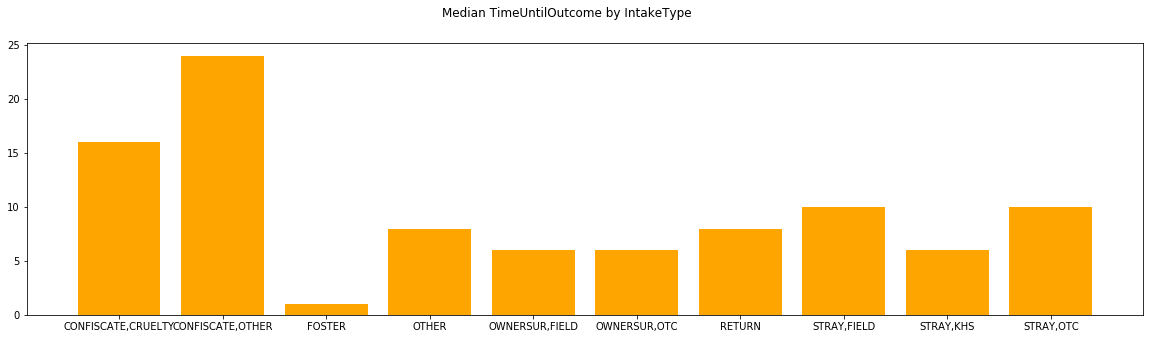

In [33]:
tuoBYit = dog_data.groupby('IntakeTypes').median()['TimeUntilOutcome']

x_labs = tuoBYit.index
y_labs = tuoBYit.values

fig, ax = plt.subplots()
ax = plt.bar(x_labs, y_labs, color='orange')
fig.suptitle('Median TimeUntilOutcome by IntakeType')
fig.set_size_inches(20, 5)

There are some signficant variations between the average time it takes for an animal to experience an outcome depending on their intake type. For example, confiscated animals are typically in the shelter 2-3 weeks (possibly to get medical attention), whereas most other types hover around 7-10 days. In contrast with cats, returned dogs stay in the shelter the same amount of time as others.

In [11]:
SO = dog_data[dog_data['IntakeTypes'] == 'STRAY,OTC']
SF = dog_data[dog_data['IntakeTypes'] == 'STRAY,FIELD']
OO = dog_data[dog_data['IntakeTypes'] == 'OWNERSUR,OTC']
CC = dog_data[dog_data['IntakeTypes'] == 'CONFISCATE,CRUELTY'] 
R = dog_data[dog_data['IntakeTypes'] == 'RETURN']
OF = dog_data[dog_data['IntakeTypes'] == 'OWNERSUR,FIELD']

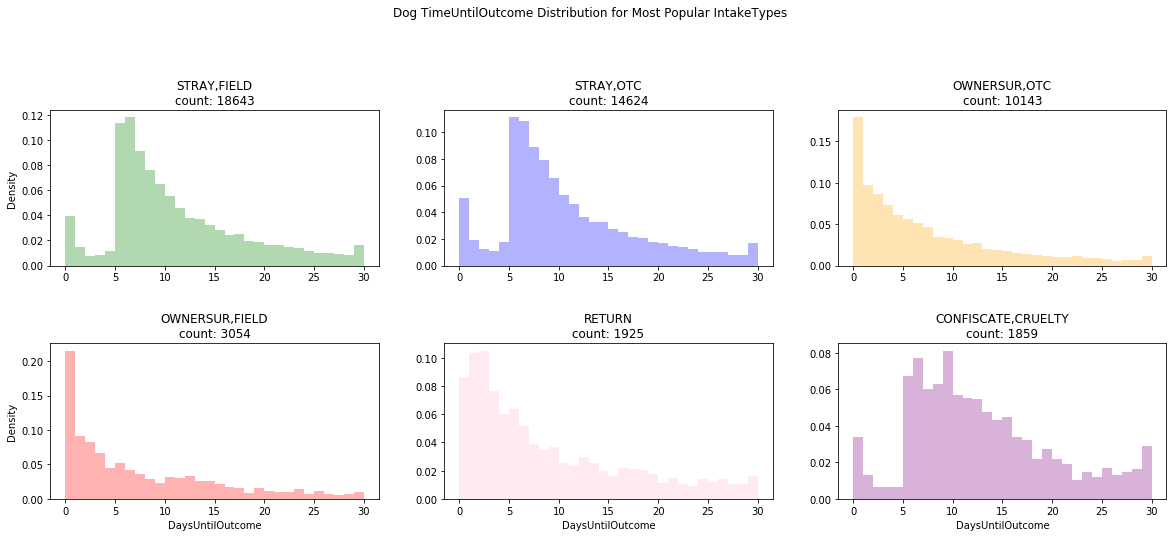

In [12]:
fig, axes = plt.subplots(2,3)

axes[0,0].hist(SF['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='green')
axes[0,1].hist(SO['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='blue')
axes[0,2].hist(OO['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='orange')
axes[1,0].hist(OF['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='red')
axes[1,1].hist(R['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='pink')
axes[1,2].hist(CC['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='purple')

axes[0,0].set_title('STRAY,FIELD\ncount: {}'.format(len(SF)))
axes[0,1].set_title('STRAY,OTC\ncount: {}'.format(len(SO)))
axes[0,2].set_title('OWNERSUR,OTC\ncount: {}'.format(len(OO)))
axes[1,0].set_title('OWNERSUR,FIELD\ncount: {}'.format(len(OF)))
axes[1,1].set_title('RETURN\ncount: {}'.format(len(R)))
axes[1,2].set_title('CONFISCATE,CRUELTY\ncount: {}'.format(len(CC)))

axes[0,0].set_ylabel('Density')
axes[1,0].set_ylabel('Density')
axes[1,0].set_xlabel('DaysUntilOutcome')
axes[1,1].set_xlabel('DaysUntilOutcome')
axes[1,2].set_xlabel('DaysUntilOutcome')

fig.suptitle('Dog TimeUntilOutcome Distribution for Most Popular IntakeTypes')
fig.subplots_adjust(top=0.8, hspace=0.5)
fig.set_size_inches(20, 8)

Strays and dogs confiscated due to cruelty typically have a very different distribution curve than when an owner surrenders and returns. It seems that for strays and confiscations, after about a week, there is a surge in outcome events that occur that quickly begin decreasing. For owner surrenders, this decrease happens from day one. This may indicate that strays and confiscated dogs are only put down after a certain amount of time or are only released to the public for adoption after a certain amount of time. Returns, on the other hand, typically stay in the shelter longer, likely because since they were adopted once, shelters want them to stay and get adopted again.

### Exploring Outcome Type Rates by Different Features ###

#### Defining Useful Function ####
This function will allow for quick crosstabulation of different features with OutcomeType. As seen below, the four major outcome types are 'ADOPTION', 'EUTH', 'FOSTER', and 'TRANSFER' and will be the only outcome types included in visuals.

In [14]:
def convert_to_pcent(cross1, cross2, features=['ADOPTION', 'EUTH', 'FOSTER', 'TRANSFER']):
    cross = pd.crosstab(cross1, cross2)
    cross_pcent = cross.iloc[0]/cross.iloc[0].sum()

    for i in range(1,len(cross)):
        cross_pcent_col = cross.iloc[i]/cross.iloc[i].sum()
        cross_pcent = pd.concat([cross_pcent, cross_pcent_col], axis=1)
    
    cross_pcent = cross_pcent.T
    cross_pcent.index = cross_pcent.index.rename(cross1.name)

    cross_pcent = cross_pcent[features]
    return cross_pcent.round(2)

#### Outcome Distribution ####

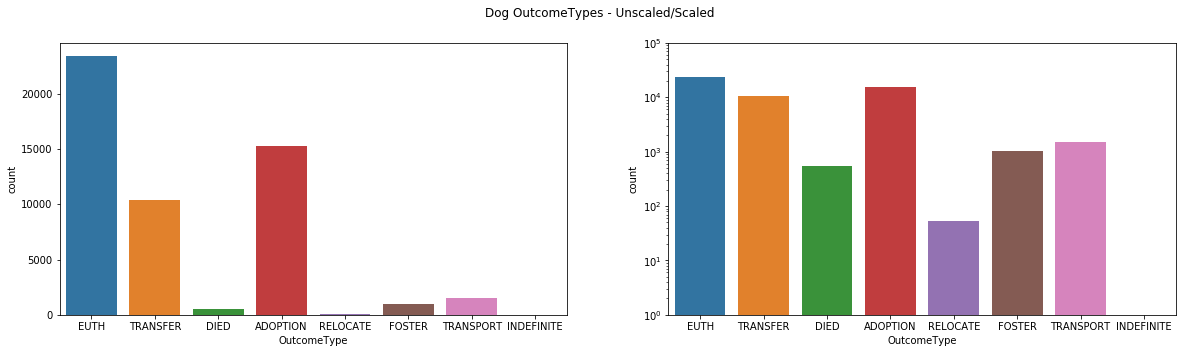

In [15]:
fig, axes = plt.subplots(1,2)
fig.suptitle("Dog OutcomeTypes - Unscaled/Scaled")

sns.countplot(x = "OutcomeType", data = dog_data, ax = axes[0])

sns.countplot(x = "OutcomeType", data = dog_data, ax = axes[1])
axes[1].set_yscale("log")
axes[1].set_ylim(1,100000)

fig.set_size_inches(20, 5)

By far, the most common outcome type is euthanasia, followed by adoption, transfer, and foster. For the remaining visuals, the focus will be on these top four.

#### OutcomeType Rate by IntakeYear ###

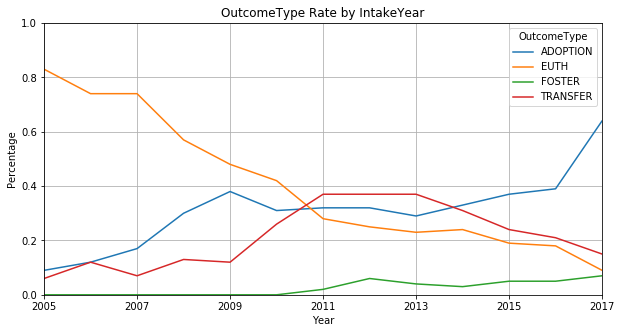

In [16]:
iyot_pcent = convert_to_pcent(dog_data.IntakeYear, dog_data.OutcomeType)
iyot_pcent.plot.line(figsize=(10,5))

plt.axis([2005,2017,0,1])
plt.title('OutcomeType Rate by IntakeYear')
plt.xlabel('Year')
plt.xticks(range(2005,2019,2))
plt.ylabel('Percentage')
plt.grid(True)

plt.show()

Fortunately, as time as gone on, the euthanasia rate at this shelter has dropped from over 80% in 2005 to 10% in 2017. Naturally, this means adoption rates have increased drastically. The foster rate has also increased from non-existant up until 2011 to nearly 10% in 2017. Oddly, transfer rates have varied very drastically over time, peaking between 2011 and 2013.

#### EUTH OutcomeSubtype Rate by IntakeYear ####

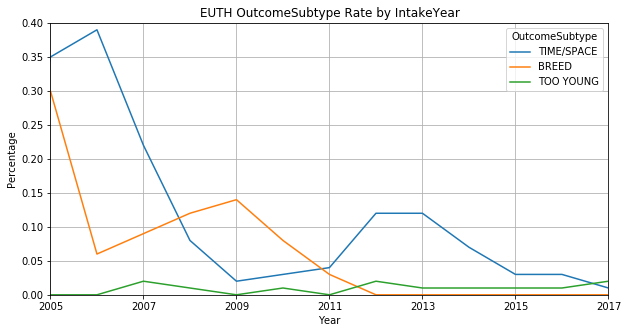

In [17]:
iyos_pcent = convert_to_pcent(dog_data.IntakeYear, dog_data.OutcomeSubtype, features=['TIME/SPACE', 'BREED', 'TOO YOUNG'])
iyos_pcent.plot.line(figsize=(10,5))

plt.axis([2005,2017,0,0.4])
plt.title('EUTH OutcomeSubtype Rate by IntakeYear')
plt.xlabel('Year')
plt.xticks(range(2005,2019,2))
plt.ylabel('Percentage')
plt.grid(True)

plt.show()

Fortunately, as time goes on, dogs are being put down far less frequently for 'TIME/SPACE' and 'BREED'. 'TIME/SPACE' was typically a big problem in 2006 but has greatly improved since. Euthanasia for 'BREED' seems to be almost non-existent as of 2012, possibly implying that there is no longer discrimination against breeds.

#### Average OutcomeType Rate by IntakeMonth ####

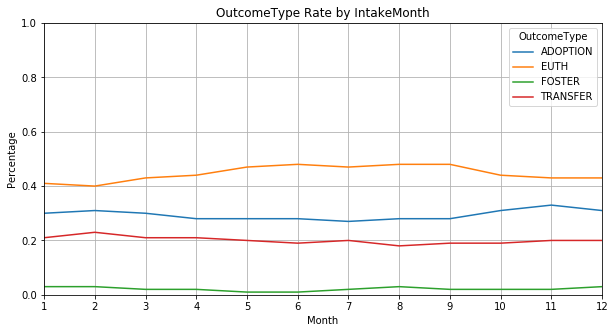

In [18]:
imot_pcent = convert_to_pcent(dog_data.IntakeMonth, dog_data.OutcomeType)
imot_pcent.plot.line(figsize=(10,5))

plt.axis([1,12,0,1])
plt.title('OutcomeType Rate by IntakeMonth')
plt.xlabel('Month')
plt.xticks(range(1,13))
plt.ylabel('Percentage')
plt.grid(True)

plt.show()

The outcome type rates stay somewhat consistent month to month.

#### Average OutcomeType Rate by IntakeDotW ####

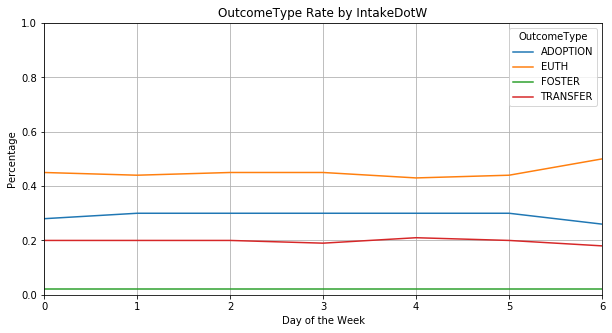

In [19]:
idot_pcent = convert_to_pcent(dog_data.IntakeDotW, dog_data.OutcomeType)
idot_pcent.plot.line(figsize=(10,5))

plt.axis([0,6,0,1])
plt.title('OutcomeType Rate by IntakeDotW')
plt.xlabel('Day of the Week')
plt.xticks(range(0,7))
plt.ylabel('Percentage')
plt.grid(True)

plt.show()

Interestingly, while outcome type rates are fairly consistent for most days of the week, animals brought in on a Sunday are significantly more likely to be euthanized. This could mean that animals brought in on Sunday were brought in emergently because of behavioral issues, but the data does not provide insight into why this is actually the case.

#### Average OutcomeType by OutcomeDotW ####
In other words, what outcomes happen on which day?

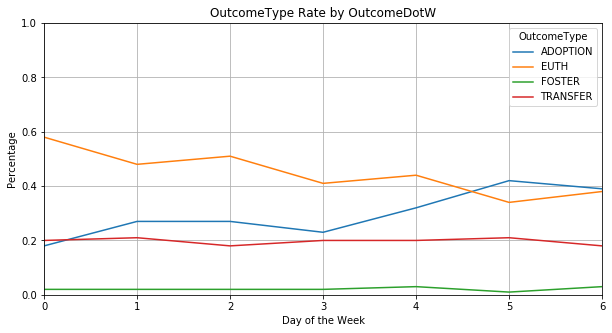

In [20]:
odot_pcent = convert_to_pcent(dog_data.OutcomeDotW, dog_data.OutcomeType)
odot_pcent.plot.line(figsize=(10,5))

plt.axis([0,6,0,1])
plt.title('OutcomeType Rate by OutcomeDotW')
plt.xlabel('Day of the Week')
plt.xticks(range(0,7))
plt.ylabel('Percentage')
plt.grid(True)

plt.show()

The data shows that adoption rates are highest at the end of the week/weekends. This could explain why euthanasia rates slowly go down as the week progresses: shelters know that animals have the highest chance of being adopted on the weekends and so they are less likely to euthanize them as the busy adoption days approach.

#### OutcomeType Rate by IntakeType ####

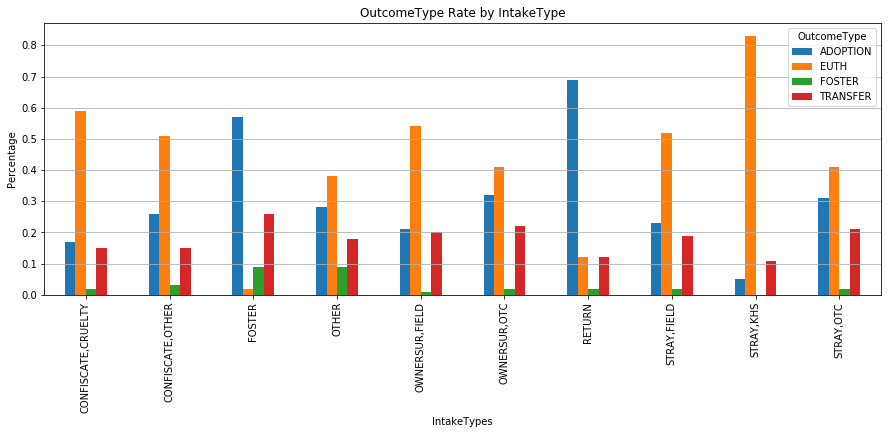

In [21]:
itot_pcent = convert_to_pcent(dog_data.IntakeTypes, dog_data.OutcomeType)
itot_pcent.plot.bar(figsize=(15,5))

plt.title('OutcomeType Rate by IntakeType')
plt.ylabel('Percentage')
plt.grid(True, axis='y')

plt.show()

Most intake types resulted in similar outcome type rates, with a few exceptions: strays from KHS, fosters, and returns. From the extremely high euthanasia rate of strays from KHS, it can be assumed that these dogs are specifically transferred to this shelter to be put down. Fosters and returns have understandably high favorable outcomes because they were either deemed worthy of a foster or they already belonged to an owner who could have simply reclaimed them. 

**The fact that fosters have more favorable outcomes is significant in that it could mean that fostering does indeed help with an animal's chance for success**, but this is not definitive, because the reason why certain animals were fostered is unknown. They may already have been more desirable.

#### OutcomeType Rate by ReproductiveStatusAtIntake ####

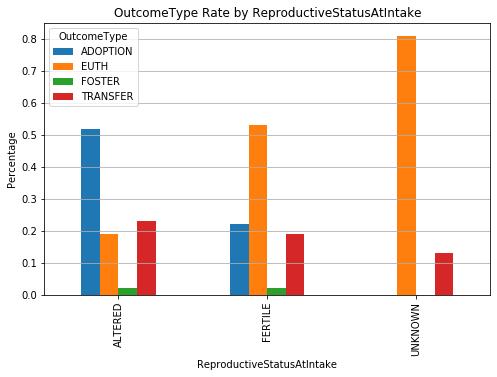

In [22]:
rsot_pcent = convert_to_pcent(dog_data.ReproductiveStatusAtIntake, dog_data.OutcomeType)
rsot_pcent.plot.bar(figsize=(8,5))

plt.title('OutcomeType Rate by ReproductiveStatusAtIntake')
plt.ylabel('Percentage')
plt.grid(True, axis='y')

plt.show()

As expected, fertile animals are euthanized much more often than sterile/altered. This is because a major problem in high-kill cities is that animals are not fixed. Euthanizing them over sterilized animals prevents them from producing more animals that will go back into the system. The high euthanasia rate for 'UNKNOWN' genders is likely due to a high number of puppies being unclassified and are put down very often, as seen further down.

#### OutcomeType Rate by Color ####

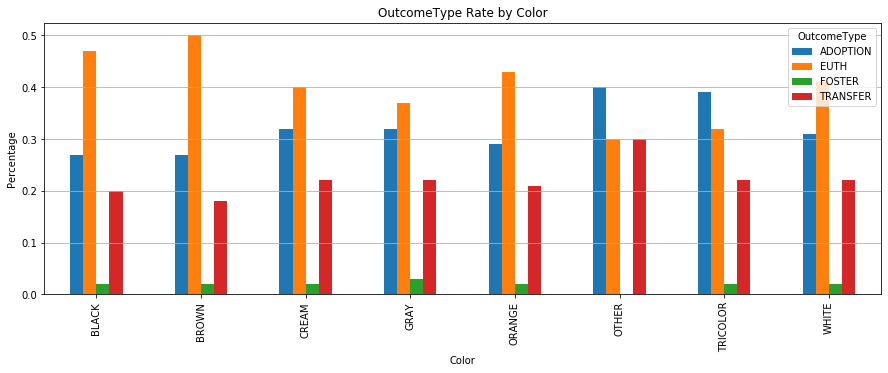

In [23]:
cot_pcent = convert_to_pcent(dog_data.Color, dog_data.OutcomeType)
cot_pcent.plot.bar(figsize=(15,5))

plt.title('OutcomeType Rate by Color')
plt.ylabel('Percentage')
plt.grid(True, axis='y')

plt.show()

There appears to be some correlation between color and euthanasia rate, with brown and black dogs being put down significantly more than gray, tricolor, and "other" (special) colored dogs.

#### OutcomeType Rate by Breed ####
Below are the top 5 most euthanized breed groups. Feel free to explore individual breed groups or breeds using the dropdown menus.

In [24]:
from ipywidgets import interact, interact_manual   # additional required imports

In [25]:
bot_pcent = convert_to_pcent(dog_data.Breed, dog_data.OutcomeType)
bot_pcent_UG = convert_to_pcent(dog_data.PrimaryBreed, dog_data.OutcomeType)

print("Top Euthanized Breeds:\n")
print(bot_pcent.sort_values('EUTH', ascending=False).head())
print("\n\nView Breeds Individually:")

@interact
def show_outcome_rates(Breed = bot_pcent.index):
    return print(bot_pcent[bot_pcent.index == Breed])

print("\nView Ungrouped Breeds Individually:")

@interact
def show_outcome_rates_ungrouped(Breed = bot_pcent_UG.index):
    return print(bot_pcent_UG[bot_pcent_UG.index == Breed])

Top Euthanized Breeds:

OutcomeType         ADOPTION  EUTH  FOSTER  TRANSFER
Breed                                               
CHOW CHOW               0.09  0.78    0.00      0.09
PIT BULL                0.14  0.74    0.02      0.08
ROTTWEILER              0.20  0.64    0.01      0.11
GERMAN SHEPHERD         0.22  0.50    0.01      0.22
LABRADOR RETRIEVER      0.27  0.46    0.02      0.21


View Breeds Individually:


interactive(children=(Dropdown(description='Breed', options=('AUSTRALIAN CATTLE DOG', 'AUSTRALIAN SHEPHERD', '…


View Ungrouped Breeds Individually:


interactive(children=(Dropdown(description='Breed', options=('AFFENPINSCHER', 'AIREDALE TERRIER', 'AKITA', 'AL…

As expected, there is also a signficant correlation between breed and euthanasia rate. Larger, "scarier" breeds, such as Chow Chows, Pit Bulls, and Rottweilers tend to get put down very often. On the other hand, smaller breeds, such as Chihuahuas, Pugs, and Shih Tzus are put down very infrequently.

#### EUTH OutcomeSubtype by Breed ####
Below are the top 5 reasons for euthanasia. Feel free to explore individual breed groups or breeds using the dropdown menus.

In [26]:
euth_dogs = dog_data[dog_data.OutcomeType == 'EUTH']
euth_reasons = euth_dogs.groupby('OutcomeSubtype').count()['AnimalID'].sort_values(ascending=False).head(4)
euth_pcents = euth_reasons / len(euth_dogs)

bos_features = ['BEHAV OBSV', 'TIME/SPACE', 'MEDICAL', 'BREED', 'TOO OLD', 'BEHAV HIST', 'CONTAG DIS']
bos_pcent = convert_to_pcent(euth_dogs.Breed, euth_dogs.OutcomeSubtype, features=bos_features)
bos_pcent_UG = convert_to_pcent(euth_dogs.PrimaryBreed, euth_dogs.OutcomeSubtype, features=bos_features)

print("Top Euthanasia Reasons:\n")
print(euth_pcents.round(2).to_string())
print("\n\nView Breeds Individually:")

@interact
def euth_reasons(Breed = bos_pcent.index):
    return print(bos_pcent[bos_pcent.index == Breed])

print("\nView Ungrouped Breeds Individually:")

@interact
def euth_reasons_UG(Breed = bos_pcent_UG.index):
    return print(bos_pcent_UG[bos_pcent_UG.index == Breed])

Top Euthanasia Reasons:

OutcomeSubtype
BEHAV OBSV    0.29
TIME/SPACE    0.25
MEDICAL       0.18
BREED         0.15


View Breeds Individually:


interactive(children=(Dropdown(description='Breed', options=('AUSTRALIAN CATTLE DOG', 'AUSTRALIAN SHEPHERD', '…


View Ungrouped Breeds Individually:


interactive(children=(Dropdown(description='Breed', options=('AIREDALE TERRIER', 'AKITA', 'ALASKAN HUSKY', 'AL…

87% of euthanasia is due to one of 4 reasons and those reasons differ greatly from breed to breed. Please note, however, that as seen above, the most common causes for euthanasia have shifted greatly in the past 5-7 years.

#### OutcomeType Rate by Gender ####

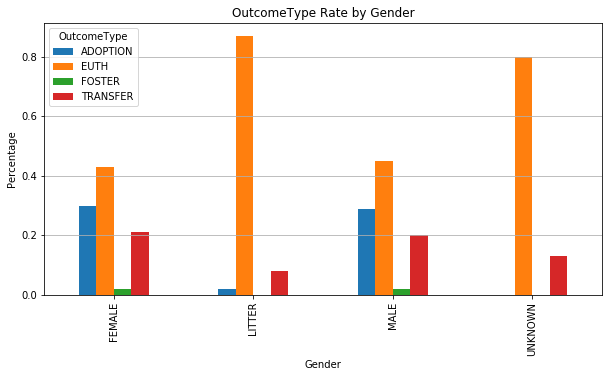

In [27]:
got_pcent = convert_to_pcent(dog_data.Gender, dog_data.OutcomeType)
got_pcent.plot.bar(figsize=(10,5))

plt.title('OutcomeType Rate by Gender')
plt.ylabel('Percentage')
plt.grid(True, axis='y')

plt.show()

Interestingly, females and males have a very similar euthanasia rate Not at all surprisingly, dogs in a litter and of unknown gender (puppies) were euthanized at an exceptionally high rate.

### Exploring TimeUntilOutcome by OutcomeType ###

#### Median TimeUntilOutcome by OutcomeType ####

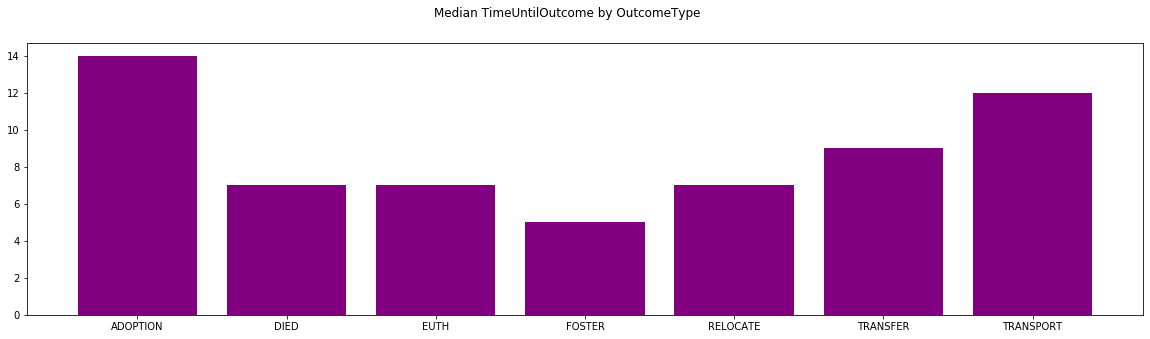

In [28]:
tuoBYot = dog_data.groupby('OutcomeType').median()['TimeUntilOutcome']
tuoBYot = tuoBYot[tuoBYot.index != 'INDEFINITE']

x_labs = tuoBYot.index
y_labs = tuoBYot.values

fig, ax = plt.subplots()
ax = plt.bar(x_labs, y_labs, color='purple')
fig.suptitle('Median TimeUntilOutcome by OutcomeType')
fig.set_size_inches(20, 5)

Somewhat surprisingly, euthanized animals stayed in the shelter a short amount of time before being put down. This is likely because many euthanized animals are put down because of their breed or behavioral observations. Adopted animals typically had much more time in the shelter. **This supports the idea that given more time (via fostering), animals will be put down less often.**

#### TimeUntilOutcome Distribution for Most Popular OutcomeTypes ####

In [29]:
E = dog_data[dog_data['OutcomeType'] == 'EUTH']
A = dog_data[dog_data['OutcomeType'] == 'ADOPTION']
T = dog_data[dog_data['OutcomeType'] == 'TRANSFER']
F = dog_data[dog_data['OutcomeType'] == 'FOSTER']

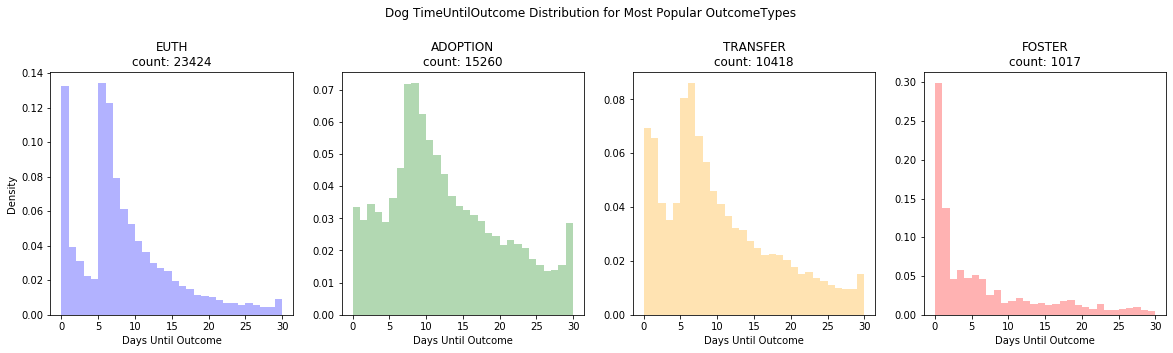

In [30]:
fig, axes = plt.subplots(1,4)

axes[0].hist(E['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='blue')
axes[1].hist(A['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='green')
axes[2].hist(T['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='orange')
axes[3].hist(F['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='red')

axes[0].set_title('EUTH\ncount: {}'.format(len(E)))
axes[1].set_title('ADOPTION\ncount: {}'.format(len(A)))
axes[2].set_title('TRANSFER\ncount: {}'.format(len(T)))
axes[3].set_title('FOSTER\ncount: {}'.format(len(F)))

axes[0].set_ylabel('Density')
axes[0].set_xlabel('Days Until Outcome')
axes[1].set_xlabel('Days Until Outcome')
axes[2].set_xlabel('Days Until Outcome')
axes[3].set_xlabel('Days Until Outcome')

fig.suptitle('Dog TimeUntilOutcome Distribution for Most Popular OutcomeTypes')
fig.subplots_adjust(top=0.8)
fig.set_size_inches(20, 5)

...
...
...
...

#### TimeUntilOutcome Distribution for Most Popular "EUTH" Subtypes ####

In [31]:
BO = dog_data[dog_data['OutcomeSubtype'] == 'BEHAV OBSV']
TS = dog_data[dog_data['OutcomeSubtype'] == 'TIME/SPACE']
M = dog_data[dog_data['OutcomeSubtype'] == 'MEDICAL']
B = dog_data[dog_data['OutcomeSubtype'] == 'BREED']
CD = dog_data[dog_data['OutcomeSubtype'] == 'CONTAG DIS']
BH = dog_data[dog_data['OutcomeSubtype'] == 'BEHAV HIST']

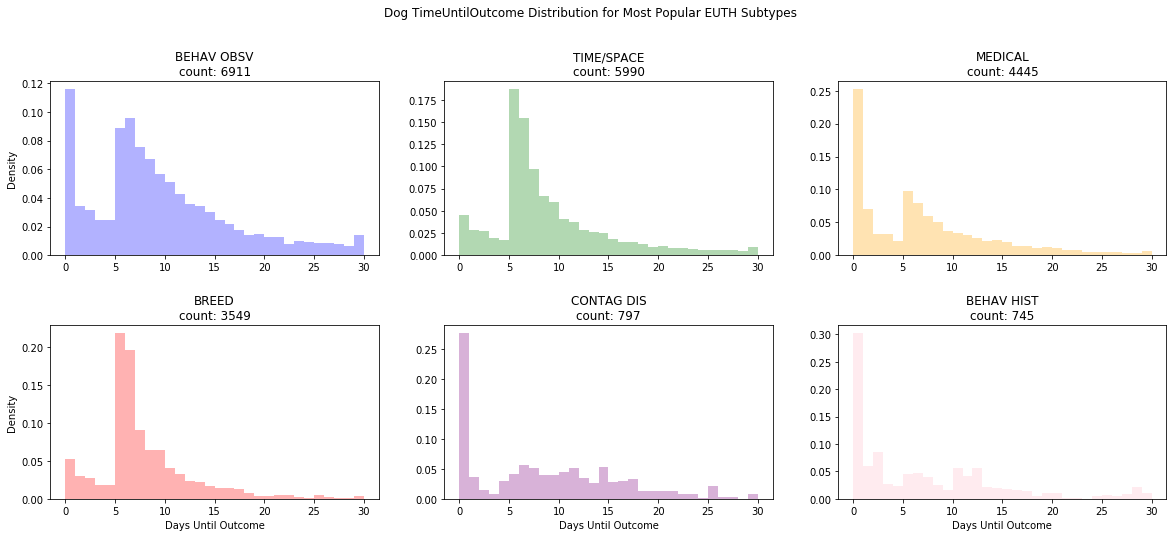

In [32]:
fig, axes = plt.subplots(2,3)

axes[0,0].hist(BO['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='blue')
axes[0,1].hist(TS['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='green')
axes[0,2].hist(M['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='orange')
axes[1,0].hist(B['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='red')
axes[1,1].hist(CD['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='purple')
axes[1,2].hist(BH['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='pink')

axes[0,0].set_title('BEHAV OBSV\ncount: {}'.format(len(BO)))
axes[0,1].set_title('TIME/SPACE\ncount: {}'.format(len(TS)))
axes[0,2].set_title('MEDICAL\ncount: {}'.format(len(M)))
axes[1,0].set_title('BREED\ncount: {}'.format(len(B)))
axes[1,1].set_title('CONTAG DIS\ncount: {}'.format(len(CD)))
axes[1,2].set_title('BEHAV HIST\ncount: {}'.format(len(BH)))

axes[0,0].set_ylabel('Density')
axes[1,0].set_ylabel('Density')
axes[1,0].set_xlabel('Days Until Outcome')
axes[1,1].set_xlabel('Days Until Outcome')
axes[1,2].set_xlabel('Days Until Outcome')

fig.suptitle('Dog TimeUntilOutcome Distribution for Most Popular EUTH Subtypes')
fig.subplots_adjust(top=0.85, hspace=0.4)
fig.set_size_inches(20, 8)

...
...
...
...